In [248]:
import pandas as pd
import numpy as np
import requests as req
import bs4
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

## Data scraping from web

In [2]:
res = req.get('https://www.worldometers.info/coronavirus/')

In [3]:
type(res)


requests.models.Response

'<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n\n\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <title>Coronavirus Update (Live): 258,739 Cases and 10,544 Deaths from COVID-19 Virus Outbreak - Worldometer</title>\n    <meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, and death toll by country due to the COVID 19 coronavirus from Wuhan, China. Coronavirus counter with new cases, historical data, and info. Daily charts, graphs, news and updates">\n\n\n    \t\n\t<!-- Favicon -->\n\t<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n\t<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n
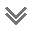

In [4]:
res.text

In [45]:
soup=bs4.BeautifulSoup(res.content,'html.parser')

In [46]:
type(soup)

bs4.BeautifulSoup

In [47]:
table=soup.select("table")

In [49]:
table

[<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%">
 <thead>
 <tr>
 <th width="100">Country,<br>Other</br></th>
 <th width="20">Total<br>Cases</br></th>
 <th width="30">New<br>Cases</br></th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 </tr>
 </thead>
 <tbody>
 <tr style="">
 <td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/china/">China</a></td>
 <td style="font-weight: bold; text-align:right">80,967</td>
 <td style="font-weight: bold; text-align:right;background-color:#FFEEAA;">+39</td>
 <td style="font-weight: bold; text-align:right;">3,248                                </td>
 <td style="font-weight: bold; text-align:right;background-color:red; color:white">+3</td>
 <td style=

In [53]:
tab=soup.find_all('table',id='main_table_countries_today')

In [54]:
tab

[<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%">
 <thead>
 <tr>
 <th width="100">Country,<br>Other</br></th>
 <th width="20">Total<br>Cases</br></th>
 <th width="30">New<br>Cases</br></th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 </tr>
 </thead>
 <tbody>
 <tr style="">
 <td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/china/">China</a></td>
 <td style="font-weight: bold; text-align:right">80,967</td>
 <td style="font-weight: bold; text-align:right;background-color:#FFEEAA;">+39</td>
 <td style="font-weight: bold; text-align:right;">3,248                                </td>
 <td style="font-weight: bold; text-align:right;background-color:red; color:white">+3</td>
 <td style=

In [57]:
len(tab)

1

In [58]:
type(tab)

bs4.element.ResultSet

In [59]:
tab=tab[0]

In [97]:
for h in tab.find_all('th'):
    print(h.text)  
    for row in tab.find_all('tr'):
        for cell in row.find_all('td'):
            print(cell.text)
    

Country,Other
China
80,967
+39
3,248                                
+3
71,150
6,569
2,136
56
Italy
41,035

3,405                                

4,440
33,190
2,498
679
Spain
20,412
+2,335
1,041                                
+210
1,588
17,783
939
437
Iran
19,644
+1,237
1,433                                
+149
6,745
11,466

234
Germany
18,588
+3,268
52                                
+8
180
18,356
2
222
USA
16,067
+2,278
219                                
+12
125
15,723
64
49
France
10,995

372                                

1,295
9,328
1,122
168
S. Korea
8,652
+87
94                                
+3
2,233
6,325
59
169
Switzerland
4,906
+684
51                                
+8
15
4,840

567
UK
3,269

184                                
+40
65
3,020
20
48
Netherlands
2,994
+534
106                                
+30
2
2,886
45
175
Austria
2,388
+209
6                                

9
2,373
14
265
Belgium
2,257
+462
37                                
+16
204
2,016
164
195
N

876
+120
7                                

46
823
2
34
Czechia
774
+80
 

4
770
6
72
Diamond Princess
712

7                                

527
178
14

Israel
705
+28
 

15
690
10
81
Brazil
651
+11
7                                

2
642
18
3
Ireland
557

3                                

5
549
6
113
Greece
495
+31
9                                
+3
19
467
20
47
Luxembourg
484
+149
5                                
+1
6
473
1
773
Pakistan
478
+24
3                                
+1
13
462

2
Qatar
460

 

10
450
6
160
Finland
450
+50
 

10
440
2
81
Chile
434
+92
 

6
428
7
23
Poland
411
+56
5                                

13
393
3
11
Iceland
409
+79
 

5
404
1
1,199
Singapore
385
+40
 

131
254
14
66
Indonesia
369
+60
32                                
+7
17
320

1
Ecuador
367
+107
5                                
+2
3
359
2
21
Turkey
359

4                                


355

4
Slovenia
341
+22
1                                


340
6
164
Thailand
322
+50
1            

774
+80
 

4
770
6
72
Diamond Princess
712

7                                

527
178
14

Israel
705
+28
 

15
690
10
81
Brazil
651
+11
7                                

2
642
18
3
Ireland
557

3                                

5
549
6
113
Greece
495
+31
9                                
+3
19
467
20
47
Luxembourg
484
+149
5                                
+1
6
473
1
773
Pakistan
478
+24
3                                
+1
13
462

2
Qatar
460

 

10
450
6
160
Finland
450
+50
 

10
440
2
81
Chile
434
+92
 

6
428
7
23
Poland
411
+56
5                                

13
393
3
11
Iceland
409
+79
 

5
404
1
1,199
Singapore
385
+40
 

131
254
14
66
Indonesia
369
+60
32                                
+7
17
320

1
Ecuador
367
+107
5                                
+2
3
359
2
21
Turkey
359

4                                


355

4
Slovenia
341
+22
1                                


340
6
164
Thailand
322
+50
1                                

42
279
1
5
Romania
308
+31
 

31
277
11
16

774
+80
 

4
770
6
72
Diamond Princess
712

7                                

527
178
14

Israel
705
+28
 

15
690
10
81
Brazil
651
+11
7                                

2
642
18
3
Ireland
557

3                                

5
549
6
113
Greece
495
+31
9                                
+3
19
467
20
47
Luxembourg
484
+149
5                                
+1
6
473
1
773
Pakistan
478
+24
3                                
+1
13
462

2
Qatar
460

 

10
450
6
160
Finland
450
+50
 

10
440
2
81
Chile
434
+92
 

6
428
7
23
Poland
411
+56
5                                

13
393
3
11
Iceland
409
+79
 

5
404
1
1,199
Singapore
385
+40
 

131
254
14
66
Indonesia
369
+60
32                                
+7
17
320

1
Ecuador
367
+107
5                                
+2
3
359
2
21
Turkey
359

4                                


355

4
Slovenia
341
+22
1                                


340
6
164
Thailand
322
+50
1                                

42
279
1
5
Romania
308
+31
 

31
277
11
16

+2
 


8

3
Kenya
7

 


7

0.1
Seychelles
7
+1
 


7

71
Equatorial Guinea
6

 


6

4
Kyrgyzstan
6
+3
 


6

0.9
Mayotte
6
+2
 


6

22
Mongolia
6

 


6

2
Tanzania
6

 


6

0.1
Aruba
5

 

1
4

47
Barbados
5

 


5

17
Saint Martin
4
+1
 


4

103
Suriname
4
+3
 


4

7
Cayman Islands
3

1                                


2

46
Curaçao
3

1                                


2

18
Gabon
3

1                                
+1

2

1
Bahamas
3

 


3

8
CAR
3
+2
 


3

0.6
Congo
3

 


3

0.5
Namibia
3

 


3

1
St. Barth
3

 


3

304
U.S. Virgin Islands
3

 


3

29
Sudan
2

1                                


1

0.05
Benin
2

 


2

0.2
Bermuda
2

 


2

32
Bhutan
2
+1
 


2

3
Greenland
2

 


2

35
Guinea
2
+1
 


2

0.2
Haiti
2
+2
 


2

0.2
Liberia
2

 


2

0.4
Mauritania
2

 


2

0.4
New Caledonia
2

 


2

7
Saint Lucia
2

 


2

11
Zambia
2

 


2

0.1
Nepal
1

 

1
0

0.03
Angola
1
+1
 


1

0.03
Antigua and Barbuda
1

 


1

10
Cabo Verde
1
+1
 


1

2
Chad
1

 


1

0

Aruba
5

 

1
4

47
Barbados
5

 


5

17
Saint Martin
4
+1
 


4

103
Suriname
4
+3
 


4

7
Cayman Islands
3

1                                


2

46
Curaçao
3

1                                


2

18
Gabon
3

1                                
+1

2

1
Bahamas
3

 


3

8
CAR
3
+2
 


3

0.6
Congo
3

 


3

0.5
Namibia
3

 


3

1
St. Barth
3

 


3

304
U.S. Virgin Islands
3

 


3

29
Sudan
2

1                                


1

0.05
Benin
2

 


2

0.2
Bermuda
2

 


2

32
Bhutan
2
+1
 


2

3
Greenland
2

 


2

35
Guinea
2
+1
 


2

0.2
Haiti
2
+2
 


2

0.2
Liberia
2

 


2

0.4
Mauritania
2

 


2

0.4
New Caledonia
2

 


2

7
Saint Lucia
2

 


2

11
Zambia
2

 


2

0.1
Nepal
1

 

1
0

0.03
Angola
1
+1
 


1

0.03
Antigua and Barbuda
1

 


1

10
Cabo Verde
1
+1
 


1

2
Chad
1

 


1

0.06
Djibouti
1

 


1

1
El Salvador
1

 


1

0.2
Fiji
1

 


1

1
Gambia
1

 


1

0.4
Vatican City
1

 


1

1,248
Isle of Man
1

 


1

12
Montserrat
1

 


1

200
Nicaragua
1

 

In [148]:
with open('covid_19.txt', 'w')as r:
    for h in tab.find_all('th'):    
        r.write(h.text.ljust(22))   
    for row in tab.find_all('tr'):            
        for cell in row.find_all('td'):
            r.write(cell.text.ljust(22))                
        r.write('\n')
    

## Data Loading

In [15]:
page='https://www.worldometers.info/coronavirus/'
table=pd.read_html(page, attrs={"id":"main_table_countries_today"})

In [16]:
tab=table[0]

In [17]:
tab.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,China,80967,+39,3248.0,3.0,71150.0,6569,2136.0,56.0
1,Italy,47021,"+5,986",4032.0,627.0,5129.0,37860,2655.0,778.0
2,Spain,20412,"+2,335",1050.0,219.0,1588.0,17774,939.0,437.0
3,Germany,19848,"+4,528",67.0,23.0,180.0,19601,2.0,237.0
4,Iran,19644,"+1,237",1433.0,149.0,6745.0,11466,NaN,234.0


## Data Cleaning

In [34]:
tab.dropna(how='all').head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,China,80967,+39,3248.0,3.0,71150.0,6569,2136.0,56.0
1,Italy,47021,"+5,986",4032.0,627.0,5129.0,37860,2655.0,778.0
2,Spain,20412,"+2,335",1050.0,219.0,1588.0,17774,939.0,437.0
3,Germany,19848,"+4,528",67.0,23.0,180.0,19601,2.0,237.0
4,Iran,19644,"+1,237",1433.0,149.0,6745.0,11466,NaN,234.0


In [61]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 9 columns):
Country             186 non-null object
TotalCases          186 non-null int64
NewCases            130 non-null object
TotalDeaths         73 non-null float64
NewDeaths           37 non-null float64
TotalRecovered      99 non-null float64
ActiveCases         186 non-null int64
Serious,Critical    68 non-null float64
Tot Cases/1M pop    185 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 13.2+ KB


In [28]:
column=np.array(tab.columns)
column

array(['Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths',
       'NewDeaths', 'TotalRecovered', 'ActiveCases', 'Serious,Critical',
       'Tot\xa0Cases/1M pop'], dtype=object)

In [30]:
column[0]='Country'
column

array(['Country', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'ActiveCases', 'Serious,Critical',
       'Tot\xa0Cases/1M pop'], dtype=object)

In [37]:
tab.columns=column
tab.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,China,80967,+39,3248.0,3.0,71150.0,6569,2136.0,56.0
1,Italy,47021,"+5,986",4032.0,627.0,5129.0,37860,2655.0,778.0
2,Spain,20412,"+2,335",1050.0,219.0,1588.0,17774,939.0,437.0
3,Germany,19848,"+4,528",67.0,23.0,180.0,19601,2.0,237.0
4,Iran,19644,"+1,237",1433.0,149.0,6745.0,11466,NaN,234.0


In [254]:
tab.fillna(0)

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,China,80967,+39,3248.0,3.0,71150.0,6569,2136.0,56.00
1,Italy,47021,"+5,986",4032.0,627.0,5129.0,37860,2655.0,778.00
2,Spain,20412,"+2,335",1050.0,219.0,1588.0,17774,939.0,437.00
3,Germany,19848,"+4,528",67.0,23.0,180.0,19601,2.0,237.00
4,Iran,19644,"+1,237",1433.0,149.0,6745.0,11466,0.0,234.00
5,USA,18121,"+4,332",233.0,26.0,125.0,17763,64.0,55.00
6,France,12612,"+1,617",450.0,78.0,1295.0,10867,1122.0,193.00
7,S. Korea,8652,+87,94.0,3.0,2233.0,6325,59.0,169.00
8,Switzerland,5407,"+1,185",56.0,13.0,15.0,5336,0.0,625.00
9,UK,3983,+714,177.0,33.0,65.0,3741,20.0,59.00


In [253]:
tab.tail()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
181,St. Vincent Grenadines,1,NaN,NaN,NaN,NaN,1,NaN,9.00
182,Sint Maarten,1,NaN,NaN,NaN,NaN,1,NaN,23.00
183,Somalia,1,NaN,NaN,NaN,NaN,1,NaN,0.06
184,Eswatini,1,NaN,NaN,NaN,NaN,1,NaN,0.90
185,Total:,272056,27162,11300.0,1272.0,90618.0,170138,7796.0,34.90


## Total cases

In [241]:
data = px.data.gapminder().head(10)

fig=px.bar(data,
           x=tab['Country'].head(10),
           y=tab['TotalCases'].head(10),
           text=tab['TotalCases'].head(10),
           labels={'y':'Cases','x':'Countries'}, color='lifeExp',         
           height=600)
fig.update_layout(title_text='Total Cases' )
fig.show()


## Total survive

In [177]:

fig=go.Figure(data=[go.Bar(name="Total Cases",x=tab['Country'].head(10),
                           y=tab["TotalCases"].head(10),text=tab["TotalCases"].head(10),textposition='auto',marker_color='lightslategrey'),
                       go.Bar(name="Survive Cases",x=tab['Country'].head(10),marker_color='crimson',
                              y=tab["TotalRecovered"].head(10),text=tab["TotalRecovered"].head(10),textposition='auto')
                ])
fig.update_layout(title_text='Total Cases VS Total Survive',height=600,width=1000,
                    yaxis=dict(title="Cases",
                    titlefont_size=16,
                    tickfont_size=14),
                   xaxis=dict(title="Countries",
                    titlefont_size=16,
                    tickfont_size=14)
                 )
                     
fig.show()


## Total Death

In [200]:

colors = ['rgb(55, 83, 109)',] * 10
colors[1]='rgb(189,3,3)'

fig=go.Figure(go.Bar(x=tab['Country'].head(10), y=tab["TotalDeaths"].head(10),text=tab["TotalDeaths"].head(10),textposition='auto'
               ,marker_color=colors)
                )
fig.update_layout(title_text='Total Cases VS Total Survive',height=600,width=1000,
                    yaxis=dict(title="Cases",
                    titlefont_size=16,
                    tickfont_size=14),
                   xaxis=dict(title="Countries",
                    titlefont_size=16,
                    tickfont_size=14),
                 )
                     
fig.show()


## Active vs Critical

In [223]:


fig= make_subplots(rows=1,cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=tab['Country'].head(10),values=tab['ActiveCases'].head(10),name="Active Cases"),1,1)
              
fig.add_trace(go.Pie(labels=tab['Country'].head(10),values=tab['Serious,Critical'].head(10),name="Ctitical Cases"),1,2)



fig.update_traces(hole=.4, hoverinfo="label+percent+name+value")

fig.update_layout(
                    title_text='Active Cases VS Critical cases',
                    annotations=[dict(text='Active', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Critical', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

## Active cases

In [239]:
data=px.data.tips()
fig=px.bar(data,x=tab['ActiveCases'].head(15), y=tab['Country'].head(15),orientation='h',color=tab['ActiveCases'].head(15),text=tab['ActiveCases'].head(15))
fig.update_layout(title_text="Active Cases",height=700,
                 yaxis=dict(title="Countries",
                    titlefont_size=16,
                    tickfont_size=14),
                   xaxis=dict(title="Cases",
                    titlefont_size=16,
                    tickfont_size=14))

fig.show()

# Total

In [270]:
tab.iloc[:11,1:]

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,80967,+39,3248.0,3.0,71150.0,6569,2136.0,56.0
1,47021,"+5,986",4032.0,627.0,5129.0,37860,2655.0,778.0
2,20412,"+2,335",1050.0,219.0,1588.0,17774,939.0,437.0
3,19848,"+4,528",67.0,23.0,180.0,19601,2.0,237.0
4,19644,"+1,237",1433.0,149.0,6745.0,11466,NaN,234.0
5,18121,"+4,332",233.0,26.0,125.0,17763,64.0,55.0
6,12612,"+1,617",450.0,78.0,1295.0,10867,1122.0,193.0
7,8652,+87,94.0,3.0,2233.0,6325,59.0,169.0
8,5407,"+1,185",56.0,13.0,15.0,5336,NaN,625.0
9,3983,+714,177.0,33.0,65.0,3741,20.0,59.0
